In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt

from src.utils.vis_utils import get_df, average_df, get_training_data

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
root = "output_dir"
df_list=[]
pattern = f"{root}/*/sup_vitb16_imagenet21k/*/*/test/*/*/*/*/logs.txt"
files = glob.glob(pattern)
print(files)
df = get_df(files, is_best=True, is_last=False)
df['training_data'] = df['file'].map(lambda x: get_training_data(x))
#         df = get_df(files, f"seed{seed}", root, is_best=False, is_last=True)
#         if df is None:
#             continue
#         df["seed"] = seed
#         df_list.append(df)
# df = pd.concat(df_list)
# df["type"] = "VPT"

['output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed875/lr0.0001_wd0.0001/patience21/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed875/lr0.0001_wd0.0001/patience14/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed875/lr0.0001_wd0.0001/patience7/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed9805/lr0.0001_wd0.0001/patience21/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed9805/lr0.0001_wd0.0001/patience14/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed9805/lr0.0001_wd0.0001/patience7/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed3172/lr0.0001_wd0.0001/patience21/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_imagenet21k/end2end/size800/test/seed3172/lr0.0001_wd0.0001/patience14/run1/logs.txt', 'output_dir/mammo-cbis/sup_vitb16_im

 49%|████▉     | 76/154 [00:00<00:00, 745.78it/s]

test_top1 2 [6.35, 6.17]


100%|██████████| 154/154 [00:00<00:00, 649.44it/s]


job output_dir/vtab-dsprites(predicted_attribute="label_orientation",num_classes=16)/sup_vitb16_imagenet21k/prompt50/crop224/test/seed9805/lr0.1_wd0.001/patience300/run1/logs.txt not ready


In [4]:
display(df)

,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data
17,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,875,0.0001,0.0100,85760258,85760258,100.0000,64,7,66.67,64.03,11,13,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 01:58:35,"([2.5895, 1.1195, 0.7927, 0.6918, 0.7191, 0.74..."
20,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,9805,0.0001,0.0100,85760258,85760258,100.0000,64,7,66.26,63.72,10,15,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 02:16:05,"([3.2431, 1.8379, 0.8793, 0.7905, 0.7072, 0.68..."
22,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,3172,0.0001,0.0100,85760258,85760258,100.0000,64,7,68.70,62.64,10,16,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 02:38:42,"([2.9202, 2.0617, 0.7987, 0.7175, 0.6711, 0.67..."
24,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,8393,0.0001,0.0100,85760258,85760258,100.0000,64,7,65.04,64.34,8,13,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 02:13:50,"([2.0566, 1.5003, 0.9222, 0.728, 0.7159, 0.670..."
26,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,4536,0.0001,0.0100,85760258,85760258,100.0000,64,7,64.23,64.96,7,13,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 01:58:04,"([3.4743, 1.9122, 0.7737, 0.6935, 0.6545, 0.66..."
15,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,875,0.0005,0.0100,85760258,85760258,100.0000,64,21,70.73,65.12,11,17,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 04:23:40,"([2.5787, 1.0275, 0.8517, 0.6958, 0.6844, 0.69..."
16,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,875,0.0005,0.0100,85760258,85760258,100.0000,64,14,69.51,67.44,16,23,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 06:09:59,"([2.5787, 1.0272, 0.852, 0.6936, 0.6812, 0.657..."
18,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,9805,0.0005,0.0100,85760258,85760258,100.0000,64,21,69.92,64.19,14,32,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 08:14:34,"([3.2618, 2.565, 0.9009, 0.9761, 0.7731, 0.732..."
19,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,9805,0.0005,0.0100,85760258,85760258,100.0000,64,14,71.14,63.88,17,29,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 07:35:55,"([3.2618, 2.5655, 0.9005, 0.9755, 0.7723, 0.73..."
21,mammo-cbis,sup_vitb16_imagenet21k,end2end,200,False,test,3172,0.0005,0.0100,85760258,85760258,100.0000,64,14,68.70,61.86,13,24,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:44:55,"([2.9372, 2.7739, 0.8855, 0.7902, 0.7307, 0.71..."


In [5]:
img_sizes = set([(row.img_size, row.cropped) for index, row in df[['img_size', 'cropped']].iterrows()])
print(img_sizes)
averages_per_img_size = []
for (img_size, cropped) in img_sizes:
    df_for_crop = df.where((df["cropped"]==cropped) & (df['img_size']==img_size)).dropna()
    # print(len(df_for_crop))
    # display(df_for_crop)
    average_df(df_for_crop, metric_names=["b-test_top1"], take_average=True)
    averages_per_img_size.append(average_df(df_for_crop, metric_names=["b-test_top1"], take_average=True))

avg_df = pd.concat(averages_per_img_size)
display(avg_df.sort_values('data'))
# f_df = average_df(df, metric_names=["b-test_top1"], take_average=True)
# f_df

{(896, True), (800, False), (500, False), (224, True), (200, False), (672, True), (384, True)}


,data,feature,transfer,total_runs,b-test_top1,b-test_top1-std,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,total_epochs,total_time,training_data
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,59.53,2.57,896.0,True,test,875.0,0.2500,0.0000,88518914.0,462338.0,0.5223,2.0,7.0,59.35,18.0,0 days 04:43:10,"([0.8011, 0.8821, 0.8899, 0.982, 0.9495, 1.005..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,3,62.53,0.65,200.0,False,test,875.0,1.0000,0.0000,86221058.0,462338.0,0.5362,64.0,7.0,68.70,31.0,0 days 04:33:15,"([0.9301, 1.4762, 0.7118, 0.7228, 0.818, 0.914..."
1,mammo-cbis,sup_vitb16_imagenet21k,end2end,12,64.10,1.34,200.0,False,test,875.0,0.0001,0.0100,85760258.0,85760258.0,100.0000,64.0,7.0,66.67,13.0,0 days 01:58:35,"([2.5895, 1.1195, 0.7927, 0.6918, 0.7191, 0.74..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,58.48,1.47,672.0,True,test,875.0,1.0000,0.0000,87465218.0,462338.0,0.5286,4.0,7.0,64.23,43.0,0 days 08:08:43,"([0.8085, 0.9917, 1.049, 1.1717, 1.0581, 1.220..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,59.41,2.01,384.0,True,test,875.0,0.1000,0.0001,86552834.0,462338.0,0.5342,16.0,7.0,65.04,36.0,0 days 04:50:59,"([0.7834, 0.7407, 0.7192, 0.7369, 0.7503, 0.72..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,10,63.38,2.00,500.0,False,test,875.0,0.5000,0.0001,86848514.0,462338.0,0.5323,32.0,14.0,70.33,39.0,0 days 06:50:08,"([0.8888, 0.9185, 0.7676, 0.7793, 0.7546, 0.74..."
1,mammo-cbis,sup_vitb16_imagenet21k,end2end,15,62.69,1.53,800.0,False,test,875.0,0.0001,0.0001,87569666.0,87569666.0,100.0000,4.0,21.0,67.07,27.0,0 days 05:24:44,"([1.8801, 0.8655, 0.7746, 0.7298, 0.7426, 0.69..."
0,mammo-cbis,sup_vitb16_imagenet21k,prompt50,9,62.45,1.87,800.0,False,test,875.0,0.2500,0.0000,88030466.0,462338.0,0.5252,4.0,14.0,71.14,36.0,0 days 07:57:45,"([0.8745, 0.7864, 0.837, 0.8616, 0.8306, 0.872..."
18,mammo-cbis,sup_vitb16_imagenet21k,prompt50,5,60.99,1.16,224.0,True,test,875.0,0.1000,0.0000,86260994.0,462338.0,0.5360,64.0,7.0,63.41,37.0,0 days 05:40:01,"([0.8583, 0.8758, 0.7085, 0.7072, 0.7128, 0.70..."
7,vtab-caltech101,sup_vitb16_imagenet21k,prompt50,5,85.05,1.32,224.0,True,test,9666.0,1.0000,0.0010,86337894.0,539238.0,0.6246,64.0,300.0,100.00,100.0,0 days 00:53:55,"([4.6743, 4.6445, 4.5756, 4.3243, 3.3816, 1.70..."


In [6]:
# average per dataset:
def aggregate(df):
    
    distinguishing_columns = ['data', 'feature', 'transfer', 'img_size', 'cropped', 'lr', 'wd', 'batch_size', 'patience', 'eval_set']
    df_agg = df[[*distinguishing_columns, 'b-test_top1', 'b-val_top1', 'total_epochs']].groupby(distinguishing_columns).agg({'b-test_top1': ['mean', 'std', 'count'], 'b-val_top1': ['mean', 'std', 'count'], 'total_epochs': 'mean'})
    return df_agg

df_agg = aggregate(df)
display(aggregate(df))

b-test_top1  \
                                                                                                                                                      mean   
data                                               feature                transfer img_size cropped lr     wd     batch_size patience eval_set               
mammo-cbis                                         sup_vitb16_imagenet21k end2end  200      False   0.0001 0.0100 64         7        test       63.938000   
                                                                                                    0.0005 0.0100 64         14       test       64.032000   
                                                                                                                             21       test       64.655000   
                                                                                   800      False   0.0001 0.0001 4          7        test       62.638000   
                                                                                                                             14       test       62.484000   
                                                                                                                             21       test       62.948000   
                                                                          prompt50 200      False   1.0000 0.0000 64         7        test       62.533333   
                                                                                   224      True    0.1000 0.0000 64         7        test       60.994000   
                                                                                   384      True    0.1000 0.0001 16         7        test       59.412000   
                                                                                   500      False   0.5000 0.0001 32         7        test       63.228000   
                                                                                                                             14       test       63.536000   
                                                                                   672      True    1.0000 0.0000 4          7        test       58.480000   
                                                                                   800      False   0.2500 0.0000 4          7        test       62.544000   
                                                                                                                             14       test       62.327500   
                                                                                   896      True    0.2500 0.0000 2          7        test       59.534000   
vtab-caltech101                                    sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test       85.050000   
vtab-cifar(num_classes=100)                        sup_vitb16_imagenet21k prompt50 224      True    0.5000 0.0010 64         300      test       71.406000   
vtab-clevr(task="closest_object_distance")         sup_vitb16_imagenet21k prompt50 224      True    5.0000 0.0010 64         300      test       57.878000   
vtab-clevr(task="count_all")                       sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0000 64         300      test       72.686000   
vtab-diabetic_retinopathy(config="btgraham-300")   sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test       70.800000   
vtab-dmlab                                         sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test       42.050000   
vtab-dsprites(predicted_attribute="label_orient... sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0010 64         300      test        5.290000   
vtab-dsprites(predicted_attribute="label_x_posi... sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0000 64         300      test       -1.000000   
vtab-dtd                           

In [7]:
display(df_agg['b-test_top1'])

mean  \
data                                               feature                transfer img_size cropped lr     wd     batch_size patience eval_set              
mammo-cbis                                         sup_vitb16_imagenet21k end2end  200      False   0.0001 0.0100 64         7        test      63.938000   
                                                                                                    0.0005 0.0100 64         14       test      64.032000   
                                                                                                                             21       test      64.655000   
                                                                                   800      False   0.0001 0.0001 4          7        test      62.638000   
                                                                                                                             14       test      62.484000   
                                                                                                                             21       test      62.948000   
                                                                          prompt50 200      False   1.0000 0.0000 64         7        test      62.533333   
                                                                                   224      True    0.1000 0.0000 64         7        test      60.994000   
                                                                                   384      True    0.1000 0.0001 16         7        test      59.412000   
                                                                                   500      False   0.5000 0.0001 32         7        test      63.228000   
                                                                                                                             14       test      63.536000   
                                                                                   672      True    1.0000 0.0000 4          7        test      58.480000   
                                                                                   800      False   0.2500 0.0000 4          7        test      62.544000   
                                                                                                                             14       test      62.327500   
                                                                                   896      True    0.2500 0.0000 2          7        test      59.534000   
vtab-caltech101                                    sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test      85.050000   
vtab-cifar(num_classes=100)                        sup_vitb16_imagenet21k prompt50 224      True    0.5000 0.0010 64         300      test      71.406000   
vtab-clevr(task="closest_object_distance")         sup_vitb16_imagenet21k prompt50 224      True    5.0000 0.0010 64         300      test      57.878000   
vtab-clevr(task="count_all")                       sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0000 64         300      test      72.686000   
vtab-diabetic_retinopathy(config="btgraham-300")   sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test      70.800000   
vtab-dmlab                                         sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0010 64         300      test      42.050000   
vtab-dsprites(predicted_attribute="label_orient... sup_vitb16_imagenet21k prompt50 224      True    0.1000 0.0010 64         300      test       5.290000   
vtab-dsprites(predicted_attribute="label_x_posi... sup_vitb16_imagenet21k prompt50 224      True    1.0000 0.0000 64         300      test      -1.000000   
vtab-dtd                                           sup_vitb16_imagenet21k prompt50 224      True    5.0000 0.0010 64         300      test      63.214000   
vtab-eurosat                                       sup_vitb16_image

,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data
15,mammo-cbis,sup_vitb16_imagenet21k,end2end,200.0,False,test,875.0,0.0005,0.0100,85760258.0,85760258.0,100.0,64.0,21.0,70.73,65.12,11.0,17.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 04:23:40,"([2.5787, 1.0275, 0.8517, 0.6958, 0.6844, 0.69..."
18,mammo-cbis,sup_vitb16_imagenet21k,end2end,200.0,False,test,9805.0,0.0005,0.0100,85760258.0,85760258.0,100.0,64.0,21.0,69.92,64.19,14.0,32.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 08:14:34,"([3.2618, 2.565, 0.9009, 0.9761, 0.7731, 0.732..."
0,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,875.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,21.0,67.07,64.65,6.0,27.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:24:44,"([1.8801, 0.8655, 0.7746, 0.7298, 0.7426, 0.69..."
3,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,9805.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,21.0,67.48,62.64,12.0,33.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 06:35:24,"([2.826, 0.9712, 0.7674, 0.7345, 0.7432, 0.700..."
6,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,3172.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,21.0,71.14,62.33,3.0,27.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:25:08,"([4.2771, 0.9733, 0.7445, 0.7268, 0.6936, 0.67..."
9,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,8393.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,21.0,66.26,64.50,5.0,27.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:24:59,"([2.1069, 0.904, 0.7843, 0.7385, 0.7194, 0.704..."
12,mammo-cbis,sup_vitb16_imagenet21k,end2end,800.0,False,test,4536.0,0.0001,0.0001,87569666.0,87569666.0,100.0,4.0,21.0,70.73,60.62,10.0,28.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/e...,0 days 05:38:48,"([4.0989, 0.9171, 0.7618, 0.7611, 0.7089, 0.70..."


data                                                        mammo-cbis
feature                                         sup_vitb16_imagenet21k
transfer                                                       end2end
img_size                                                         200.0
cropped                                                          False
eval_set                                                          test
seed                                                             875.0
lr                                                              0.0005
wd                                                                0.01
total_params                                                85760258.0
tuned_params                                                85760258.0
tuned / total (%)                                                100.0
batch_size                                                        64.0
patience                                                          21.0
b-val_

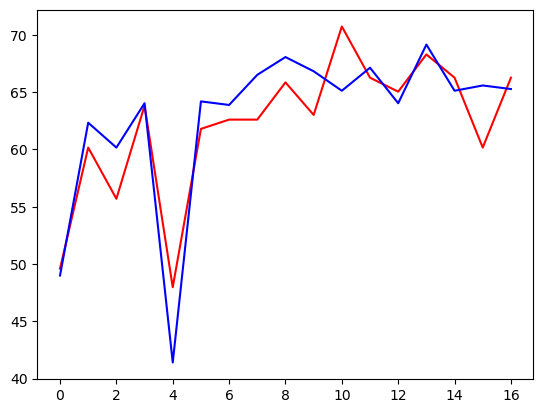

data                                                        mammo-cbis
feature                                         sup_vitb16_imagenet21k
transfer                                                       end2end
img_size                                                         800.0
cropped                                                          False
eval_set                                                          test
seed                                                            4536.0
lr                                                              0.0001
wd                                                              0.0001
total_params                                                87569666.0
tuned_params                                                87569666.0
tuned / total (%)                                                100.0
batch_size                                                         4.0
patience                                                          21.0
b-val_

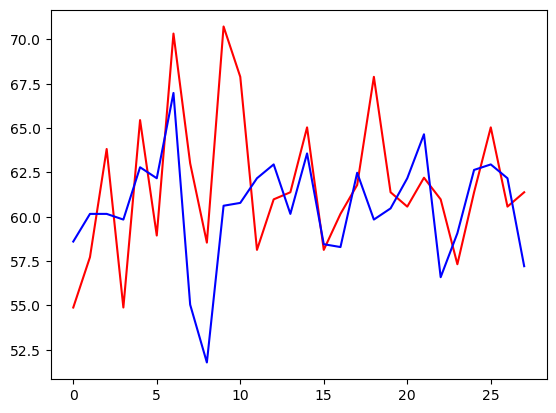

In [13]:
# show a training run of each mammography configuration
filters = {'data': 'mammo-cbis', 'transfer': 'end2end', 'patience': 21}
filtered_df = df
for filter in filters.items():
    key, value = filter
    filtered_df = filtered_df.where(filtered_df[key] == value).dropna()
display(filtered_df)
# take the first row of the filtered df, and show its training curve
row = filtered_df.iloc[0]
display(row)
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')
plt.show()


row = filtered_df.iloc[-1]
display(row)
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')
plt.show()

    


,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data
56,mammo-cbis,sup_vitb16_imagenet21k,prompt50,200.0,False,test,875.0,1.00,0.0000,86221058.0,462338.0,0.5362,64.0,7.0,68.70,61.86,24.0,31.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 04:33:15,"([0.9301, 1.4762, 0.7118, 0.7228, 0.818, 0.914..."
57,mammo-cbis,sup_vitb16_imagenet21k,prompt50,200.0,False,test,9805.0,1.00,0.0000,86221058.0,462338.0,0.5362,64.0,7.0,67.89,62.33,23.0,30.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 04:28:25,"([0.9016, 1.4435, 0.7267, 0.7399, 0.712, 0.723..."
58,mammo-cbis,sup_vitb16_imagenet21k,prompt50,200.0,False,test,4536.0,1.00,0.0000,86221058.0,462338.0,0.5362,64.0,7.0,63.41,63.41,13.0,18.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 03:07:27,"([1.4576, 2.0171, 0.7429, 0.743, 0.7491, 0.767..."
59,mammo-cbis,sup_vitb16_imagenet21k,prompt50,224.0,True,test,875.0,0.10,0.0000,86260994.0,462338.0,0.5360,64.0,7.0,63.41,60.78,27.0,37.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 05:40:01,"([0.8583, 0.8758, 0.7085, 0.7072, 0.7128, 0.70..."
60,mammo-cbis,sup_vitb16_imagenet21k,prompt50,224.0,True,test,9805.0,0.10,0.0000,86260994.0,462338.0,0.5360,64.0,7.0,61.79,60.31,40.0,40.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 06:07:59,"([0.917, 1.4532, 0.7054, 0.7095, 0.7069, 0.710..."
61,mammo-cbis,sup_vitb16_imagenet21k,prompt50,224.0,True,test,3172.0,0.10,0.0000,86260994.0,462338.0,0.5360,64.0,7.0,62.60,63.26,22.0,29.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 04:29:44,"([1.3235, 1.2801, 0.7094, 0.6987, 0.6954, 0.72..."
62,mammo-cbis,sup_vitb16_imagenet21k,prompt50,224.0,True,test,8393.0,0.10,0.0000,86260994.0,462338.0,0.5360,64.0,7.0,61.79,60.62,18.0,36.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 05:26:36,"([1.2095, 1.3083, 0.7054, 0.7013, 0.6901, 0.70..."
63,mammo-cbis,sup_vitb16_imagenet21k,prompt50,224.0,True,test,4536.0,0.10,0.0000,86260994.0,462338.0,0.5360,64.0,7.0,59.76,60.00,19.0,23.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 03:37:42,"([1.461, 1.3891, 0.7294, 0.7081, 0.7029, 0.726..."
27,mammo-cbis,sup_vitb16_imagenet21k,prompt50,384.0,True,test,875.0,0.10,0.0001,86552834.0,462338.0,0.5342,16.0,7.0,65.04,57.98,32.0,36.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 04:50:59,"([0.7834, 0.7407, 0.7192, 0.7369, 0.7503, 0.72..."
28,mammo-cbis,sup_vitb16_imagenet21k,prompt50,384.0,True,test,9805.0,0.10,0.0001,86552834.0,462338.0,0.5342,16.0,7.0,59.35,57.21,21.0,22.0,output_dir/mammo-cbis/sup_vitb16_imagenet21k/p...,0 days 03:34:28,"([0.9036, 0.9101, 0.744, 0.7237, 0.7443, 0.731..."


data                                                        mammo-cbis
feature                                         sup_vitb16_imagenet21k
transfer                                                      prompt50
img_size                                                         200.0
cropped                                                          False
eval_set                                                          test
seed                                                             875.0
lr                                                                 1.0
wd                                                                 0.0
total_params                                                86221058.0
tuned_params                                                  462338.0
tuned / total (%)                                               0.5362
batch_size                                                        64.0
patience                                                           7.0
b-val_

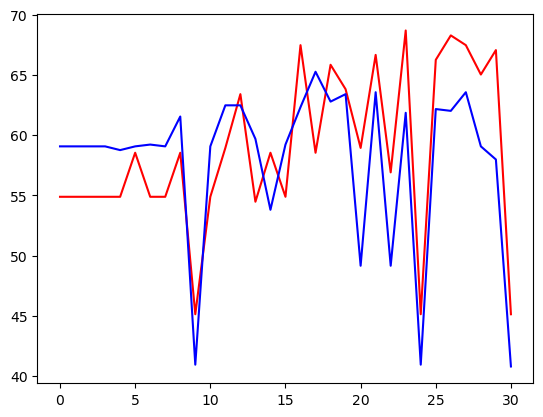

data                                                        mammo-cbis
feature                                         sup_vitb16_imagenet21k
transfer                                                      prompt50
img_size                                                         896.0
cropped                                                           True
eval_set                                                          test
seed                                                            4536.0
lr                                                                0.25
wd                                                                 0.0
total_params                                                88518914.0
tuned_params                                                  462338.0
tuned / total (%)                                               0.5223
batch_size                                                         2.0
patience                                                           7.0
b-val_

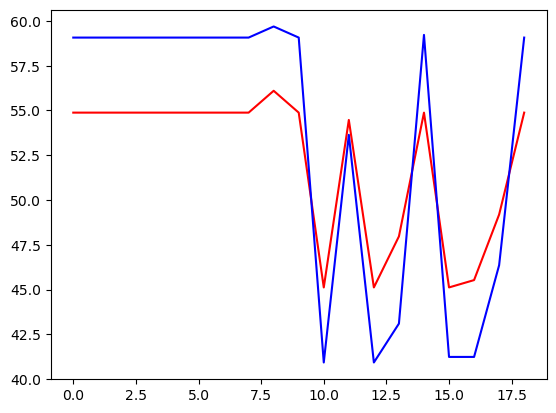

In [15]:

filters = {'data': 'mammo-cbis', 'transfer': 'prompt50', 'patience': 7}
filtered_df = df
for filter in filters.items():
    key, value = filter
    filtered_df = filtered_df.where(filtered_df[key] == value).dropna()
display(filtered_df)
# take the first row of the filtered df, and show its training curve
row = filtered_df.iloc[0]
display(row)
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')
plt.show()


row = filtered_df.iloc[-1]
display(row)
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')
plt.show()


    

,data,feature,transfer,img_size,cropped,eval_set,seed,lr,wd,total_params,tuned_params,tuned / total (%),batch_size,patience,b-val_top1,b-test_top1,best_epoch,total_epochs,file,total_time,training_data
100,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,875.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,95.5,43.48,98.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:35:59,"([2.258, 2.3211, 1.8614, 1.8005, 1.777, 1.7902..."
101,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,9805.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,94.5,42.87,96.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:38:20,"([3.9087, 4.1669, 2.5929, 1.8905, 1.8284, 1.81..."
102,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,3172.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,95.5,41.38,96.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:36:11,"([2.2754, 3.1525, 1.9242, 1.8165, 1.8245, 1.76..."
103,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,8393.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,51.0,39.94,91.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:35:56,"([2.1155, 2.295, 1.8141, 1.7979, 1.7843, 1.798..."
104,vtab-dmlab,sup_vitb16_imagenet21k,prompt50,224.0,True,test,4536.0,1.0,0.001,86264070.0,465414.0,0.5395,64.0,300.0,97.0,42.58,96.0,100.0,output_dir/vtab-dmlab/sup_vitb16_imagenet21k/p...,0 days 02:35:59,"([2.1531, 2.1165, 1.8527, 1.8949, 1.8016, 1.85..."


data                                                        vtab-dmlab
feature                                         sup_vitb16_imagenet21k
transfer                                                      prompt50
img_size                                                         224.0
cropped                                                           True
eval_set                                                          test
seed                                                             875.0
lr                                                                 1.0
wd                                                               0.001
total_params                                                86264070.0
tuned_params                                                  465414.0
tuned / total (%)                                               0.5395
batch_size                                                        64.0
patience                                                         300.0
b-val_

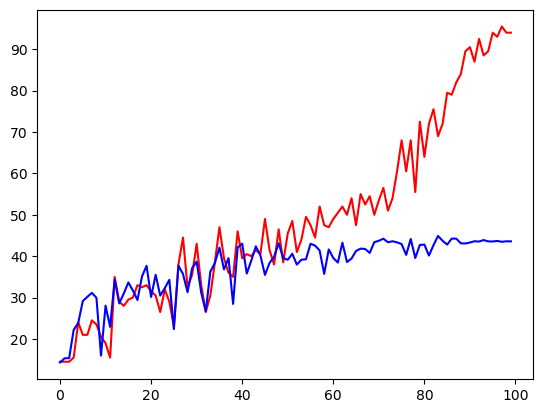

data                                                        vtab-dmlab
feature                                         sup_vitb16_imagenet21k
transfer                                                      prompt50
img_size                                                         224.0
cropped                                                           True
eval_set                                                          test
seed                                                            4536.0
lr                                                                 1.0
wd                                                               0.001
total_params                                                86264070.0
tuned_params                                                  465414.0
tuned / total (%)                                               0.5395
batch_size                                                        64.0
patience                                                         300.0
b-val_

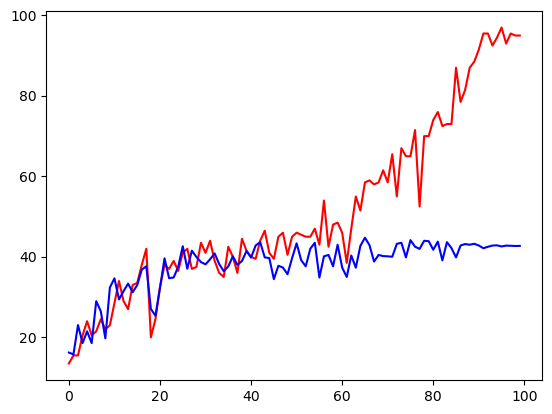

In [16]:

filters = {'data': 'vtab-dmlab', 'transfer': 'prompt50', 'patience': 300}
filtered_df = df
for filter in filters.items():
    key, value = filter
    filtered_df = filtered_df.where(filtered_df[key] == value).dropna()
display(filtered_df)
# take the first row of the filtered df, and show its training curve
row = filtered_df.iloc[0]
display(row)
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')
plt.show()


row = filtered_df.iloc[-1]
display(row)
training_data = row['training_data']
val_data = training_data[1]['val_top1']
test_data = training_data[1]['test_top1']
x_range = range(len(val_data))
plt.plot(x_range, val_data, 'r', x_range, test_data, 'b')
plt.show()

    